In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [76]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Working only with Sepal Length and Petal Width

In [77]:
data = data.iloc[:, [2, 3, 5]]
data.head()

,SepalWidthCm,PetalLengthCm,Species
0,3.5,1.4,Iris-setosa
1,3.0,1.4,Iris-setosa
2,3.2,1.3,Iris-setosa
3,3.1,1.5,Iris-setosa
4,3.6,1.4,Iris-setosa


In [78]:
data['Species'].replace('Iris-setosa','0',inplace=True)
data['Species'].replace('Iris-versicolor','1',inplace=True)
data['Species'].replace('Iris-virginica','2',inplace=True)

In [79]:
data.shape

(150, 3)

In [80]:
data.head()

,SepalWidthCm,PetalLengthCm,Species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [81]:
X=data.iloc[:,0:2].values
y=data.iloc[:,2].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [83]:
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [84]:
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


In [85]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
a = np.arange(start = X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)
a.shape

(695,)

In [87]:
b.shape

(528,)

In [88]:
XX, YY = np.meshgrid(a, b)

In [89]:
XX.shape

(528, 695)

In [90]:
YY.shape

(528, 695)

In [91]:
x = np.array([XX.ravel(), YY.ravel()]).T
labels = clf.predict(x)

In [92]:
labels.shape

(366960,)

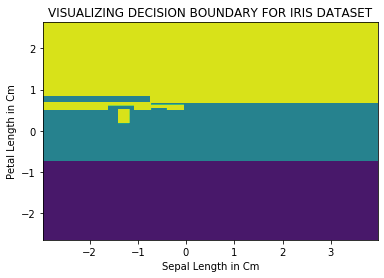

In [93]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.xlabel("Sepal Length in Cm")
plt.ylabel("Petal Length in Cm")
plt.title("VISUALIZING DECISION BOUNDARY FOR IRIS DATASET")
plt.show()

In [94]:
X_train[:,0].shape
X_train[:,1]

array([ 0.94458035,  0.54242754, -1.23853491,  0.14027473, -0.20442768,
        0.02537393,  0.54242754, -1.41088611,  1.28928276, -1.35343571,
       -1.41088611,  1.23183236,  0.48497714, -1.12363411,  1.00203076,
        0.37007634, -1.41088611,  0.02537393, -1.52578692,  1.28928276,
        0.54242754,  0.37007634, -1.35343571,  0.08282433,  0.71477875,
        1.00203076,  0.71477875,  1.00203076, -0.03207647, -1.35343571,
        1.00203076, -1.46833651, -1.46833651,  0.37007634,  0.94458035,
       -1.29598531, -0.31932848,  0.37007634,  1.63398517,  0.19772513,
        0.25517553, -1.46833651, -1.35343571,  0.88712995,  0.14027473,
       -1.52578692,  1.40418357,  0.71477875,  0.37007634,  0.19772513,
       -1.35343571,  0.37007634,  0.31262594, -1.46833651, -1.46833651,
        1.17438196,  0.19772513,  0.82967955, -1.29598531,  0.37007634,
       -1.29598531, -1.35343571,  0.08282433,  0.59987794,  0.88712995,
       -1.35343571, -1.41088611, -0.14697728,  0.59987794,  1.57

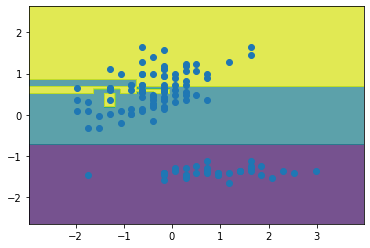

In [107]:
# plt.contourf(XX,YY,labels.reshape(XX.reshape),alpha=0.75)
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1])